In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data into a pandas DataFrame
ibrd_data = pd.read_csv('IBRD_Statement_Of_Loans_-_Historical_Data.csv', low_memory=False)

In [3]:
ibrd_data.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,04/30/2011 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NON POOL,Repaid,...,249962000.0,0.0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,05/31/2011 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NON POOL,Repaid,...,249962000.0,0.0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
2,06/30/2011 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NON POOL,Repaid,...,249962000.0,0.0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
3,07/31/2011 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NON POOL,Repaid,...,249962000.0,0.0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
4,08/31/2011 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NON POOL,Repaid,...,249962000.0,0.0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN


In [4]:
# Convert date columns to datetime objects
date_columns = ['End of Period','First Repayment Date','Last Repayment Date','Agreement Signing Date',
                'Board Approval Date', 'Effective Date (Most Recent)', 'Closed Date (Most Recent)','Last Disbursement Date']

# ibrd_data[date_columns] = ibrd_data[date_columns].apply(pd.to_datetime)


for col in date_columns:
    ibrd_data[col] = pd.to_datetime(ibrd_data[col], errors='coerce')


C:\Users\kalya\AppData\Local\Temp\ipykernel_22512\3872568514.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ibrd_data[col] = pd.to_datetime(ibrd_data[col], errors='coerce')
C:\Users\kalya\AppData\Local\Temp\ipykernel_22512\3872568514.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ibrd_data[col] = pd.to_datetime(ibrd_data[col], errors='coerce')
C:\Users\kalya\AppData\Local\Temp\ipykernel_22512\3872568514.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ibrd_data[col] = pd.to_datetime(ibrd_data[col], errors='coerce')
C:\Users\kalya\AppData\Local\Temp\ipykernel_22

In [5]:
ibrd_data.shape

(1241728, 33)

In [6]:
ibrd_data = ibrd_data[ (ibrd_data['Interest Rate'] > 0 ) & ( ibrd_data['Agreement Signing Date'].dt.year > 2000) ]

In [7]:
# ibrd_data.to_csv('ibrd_updated.csv')

In [8]:
ibrd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46928 entries, 859421 to 973458
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 46928 non-null  datetime64[ns]
 1   Loan Number                   46928 non-null  object        
 2   Region                        46928 non-null  object        
 3   Country Code                  46928 non-null  object        
 4   Country                       46928 non-null  object        
 5   Borrower                      46928 non-null  object        
 6   Guarantor Country Code        46928 non-null  object        
 7   Guarantor                     45977 non-null  object        
 8   Loan Type                     46928 non-null  object        
 9   Loan Status                   46928 non-null  object        
 10  Interest Rate                 46928 non-null  float64       
 11  Currency of Commitment     

In [9]:
ibrd_data.describe()

,End of Period,Interest Rate,Currency of Commitment,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
count,46928,46928.000000,0.0,4.692800e+04,4.692800e+04,4.692800e+04,4.692800e+04,4.692800e+04,4.692800e+04,4.692800e+04,...,46928.0,46928.0,4.692800e+04,46928,46928,46928,46928,46927,46928,46744
mean,2017-06-28 11:24:27.984998144,1.656480,NaN,1.210176e+08,1.590784e+07,3.036270e+06,9.808150e+07,5.680168e+07,4.083522e+07,9.060256e+03,...,0.0,0.0,4.387149e+07,2009-06-29 21:12:14.606205184,2022-01-26 13:12:15.833617664,2004-06-19 03:44:49.873849216,2004-02-28 11:33:42.161609344,2004-10-06 19:01:53.154473984,2010-03-29 23:47:04.889191936,2010-04-12 08:39:16.049974272
min,2011-04-30 00:00:00,0.020000,NaN,0.000000e+00,0.000000e+00,-1.000000e-02,-4.660000e-10,0.000000e+00,-1.000000e-02,-3.544333e+05,...,0.0,0.0,-2.000000e-02,1931-04-08 00:00:00,2006-04-15 00:00:00,2001-01-09 00:00:00,1999-06-08 00:00:00,2001-03-12 00:00:00,2001-09-28 00:00:00,2001-06-26 00:00:00
25%,2014-06-30 00:00:00,0.870000,NaN,3.000000e+07,0.000000e+00,0.000000e+00,2.040774e+07,7.931939e+06,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,2007-07-15 00:00:00,2020-04-15 00:00:00,2002-05-10 00:00:00,2002-03-19 00:00:00,2002-08-30 00:00:00,2007-12-31 00:00:00,2008-06-27 00:00:00
50%,2017-05-31 00:00:00,1.050000,NaN,8.410000e+07,6.840376e+05,0.000000e+00,5.862346e+07,2.926500e+07,1.282901e+07,0.000000e+00,...,0.0,0.0,1.378576e+07,2009-08-15 00:00:00,2022-05-15 00:00:00,2004-07-15 00:00:00,2004-04-29 00:00:00,2004-10-29 00:00:00,2010-06-30 00:00:00,2010-05-10 00:00:00
75%,2020-07-31 00:00:00,2.130000,NaN,1.500000e+08,8.417180e+06,0.000000e+00,1.325959e+08,7.101717e+07,5.576500e+07,0.000000e+00,...,0.0,0.0,5.920880e+07,2011-06-15 00:00:00,2024-06-15 00:00:00,2006-03-13 00:00:00,2005-12-13 00:00:00,2006-06-12 00:00:00,2012-06-30 00:00:00,2012-07-12 00:00:00
max,2023-08-31 00:00:00,9.370000,NaN,8.000000e+08,5.340000e+08,2.996446e+08,7.000000e+08,7.000000e+08,5.728802e+08,1.199755e+07,...,0.0,0.0,6.000000e+08,2028-04-12 00:00:00,2028-05-15 00:00:00,2009-09-16 00:00:00,2008-03-18 00:00:00,2010-02-05 00:00:00,2021-12-31 00:00:00,2022-12-16 00:00:00
std,NaN,1.403262,NaN,1.299987e+08,5.114363e+07,1.675947e+07,1.145630e+08,8.176372e+07,6.566558e+07,2.484603e+05,...,0.0,0.0,7.008282e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing:

#### Handle missing values, which may involve imputing missing data or removing rows/columns with missing values.

In [10]:
# Check for missing data and summarize it
missing_data_summary = ibrd_data.isnull().sum().sort_values(ascending=False)
missing_data_summary

Currency of Commitment          46928
Project Name                     5652
Guarantor                         951
Last Disbursement Date            184
Effective Date (Most Recent)        1
Due 3rd Party                       0
Exchange Adjustment                 0
Borrower's Obligation               0
Sold 3rd Party                      0
Repaid 3rd Party                    0
Loans Held                          0
Repaid to IBRD                      0
First Repayment Date                0
Last Repayment Date                 0
Agreement Signing Date              0
Board Approval Date                 0
Closed Date (Most Recent)           0
Due to IBRD                         0
End of Period                       0
Disbursed Amount                    0
Loan Number                         0
Cancelled Amount                    0
Original Principal Amount           0
Project ID                          0
Interest Rate                       0
Loan Status                         0
Loan Type   

In [11]:
# Calculate percentage of missing data for each column
missing_data_percentage = (missing_data_summary / len(ibrd_data)) * 100
missing_data_percentage

Currency of Commitment          100.000000
Project Name                     12.043982
Guarantor                         2.026509
Last Disbursement Date            0.392090
Effective Date (Most Recent)      0.002131
Due 3rd Party                     0.000000
Exchange Adjustment               0.000000
Borrower's Obligation             0.000000
Sold 3rd Party                    0.000000
Repaid 3rd Party                  0.000000
Loans Held                        0.000000
Repaid to IBRD                    0.000000
First Repayment Date              0.000000
Last Repayment Date               0.000000
Agreement Signing Date            0.000000
Board Approval Date               0.000000
Closed Date (Most Recent)         0.000000
Due to IBRD                       0.000000
End of Period                     0.000000
Disbursed Amount                  0.000000
Loan Number                       0.000000
Cancelled Amount                  0.000000
Original Principal Amount         0.000000
Project ID 

In [12]:
# Drop columns with a very high percentage of missing values more than 50% missing
columns_to_drop = ibrd_data.columns[ ( ibrd_data.isnull().sum()/ len(ibrd_data) ) * 100  > 50]
print(columns_to_drop)
ibrd_data= ibrd_data.drop(columns=columns_to_drop)

Index(['Currency of Commitment'], dtype='object')


In [13]:
# Calculate percentage of missing data for each column
missing_data_percentage = (ibrd_data.isnull().sum().sort_values(ascending=False) / len(ibrd_data)) * 100
missing_data_percentage

Project Name                    12.043982
Guarantor                        2.026509
Last Disbursement Date           0.392090
Effective Date (Most Recent)     0.002131
Due 3rd Party                    0.000000
Exchange Adjustment              0.000000
Borrower's Obligation            0.000000
Sold 3rd Party                   0.000000
Repaid 3rd Party                 0.000000
First Repayment Date             0.000000
Loans Held                       0.000000
Repaid to IBRD                   0.000000
Last Repayment Date              0.000000
Agreement Signing Date           0.000000
Board Approval Date              0.000000
Closed Date (Most Recent)        0.000000
Due to IBRD                      0.000000
End of Period                    0.000000
Loan Number                      0.000000
Undisbursed Amount               0.000000
Cancelled Amount                 0.000000
Original Principal Amount        0.000000
Project ID                       0.000000
Interest Rate                    0

In [14]:
# Now you can fill the missing values with 'Unknown'
for col in ['Project Name ']:    
    ibrd_data[col].fillna('Unknown', inplace=True)


In [15]:
#fill missing values with mean value
interest_rate_median = ibrd_data['Interest Rate'].median()
ibrd_data['Interest Rate'].fillna(interest_rate_median, inplace=True)

In [16]:
# Fill in missing 'Guarantor Country Code' with the 'Country Code'
        
ibrd_data['Guarantor Country Code'] = ibrd_data['Guarantor Country Code'].fillna(ibrd_data['Country Code'])

# Fill in missing 'Guarantor' with the 'Country'
ibrd_data['Guarantor'] = ibrd_data['Guarantor'].fillna(ibrd_data['Country'])

ibrd_data[['Guarantor Country Code','Guarantor']].isnull().sum()

Guarantor Country Code    0
Guarantor                 0
dtype: int64

In [17]:
# drop null values present in 'Board Approval Date','Closed Date (Most Recent)','First Repayment Date','Last Repayment Date' columns
ibrd_data.dropna(subset=['Last Disbursement Date','Effective Date (Most Recent)'],inplace=True)

In [18]:
columns = ['Due 3rd Party','Repaid 3rd Party','Sold 3rd Party']
ibrd_data.drop(columns, inplace=True, axis=1)

In [19]:
ibrd_data.duplicated().sum()

0

In [20]:
# Check the remaining missing data and the shape of the cleaned DataFrame
missing_data_summary = ibrd_data.isnull().sum().sort_values(ascending = False)
missing_data_summary

End of Period                   0
Undisbursed Amount              0
Closed Date (Most Recent)       0
Effective Date (Most Recent)    0
Board Approval Date             0
Agreement Signing Date          0
Last Repayment Date             0
First Repayment Date            0
Loans Held                      0
Borrower's Obligation           0
Exchange Adjustment             0
Due to IBRD                     0
Repaid to IBRD                  0
Disbursed Amount                0
Cancelled Amount                0
Loan Number                     0
Original Principal Amount       0
Project Name                    0
Project ID                      0
Interest Rate                   0
Loan Status                     0
Loan Type                       0
Guarantor                       0
Guarantor Country Code          0
Borrower                        0
Country                         0
Country Code                    0
Region                          0
Last Disbursement Date          0
dtype: int64

In [21]:
ibrd_data.shape

(46743, 29)

In [22]:
# ibrd_data.to_csv('ibrd_data.csv')

C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


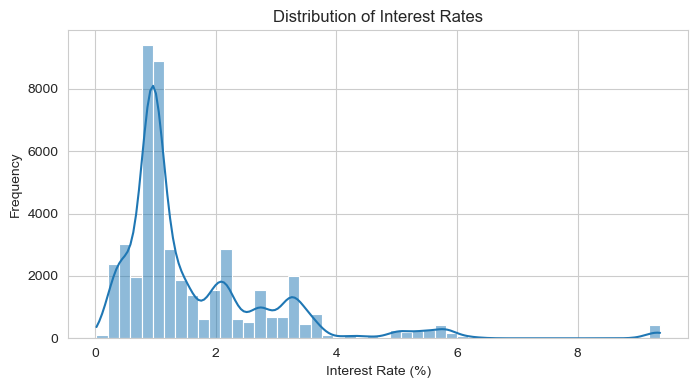

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot distribution of the interest rate
plt.figure(figsize=(8, 4))
sns.histplot(ibrd_data['Interest Rate'], kde=True, bins=50)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


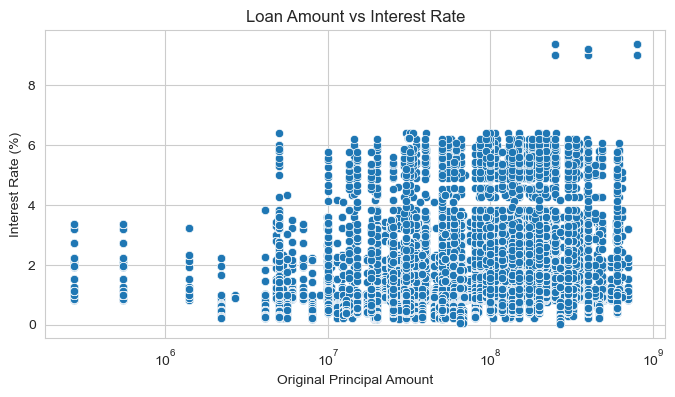

In [24]:
# Scatter plot of Loan Amount vs Interest Rate
plt.figure(figsize=(8, 4))
sns.scatterplot(x=ibrd_data['Original Principal Amount'], y=ibrd_data['Interest Rate'])
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('Original Principal Amount')
plt.ylabel('Interest Rate (%)')
plt.xscale('log') # Using a log scale due to wide range of loan amounts
plt.show()

C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


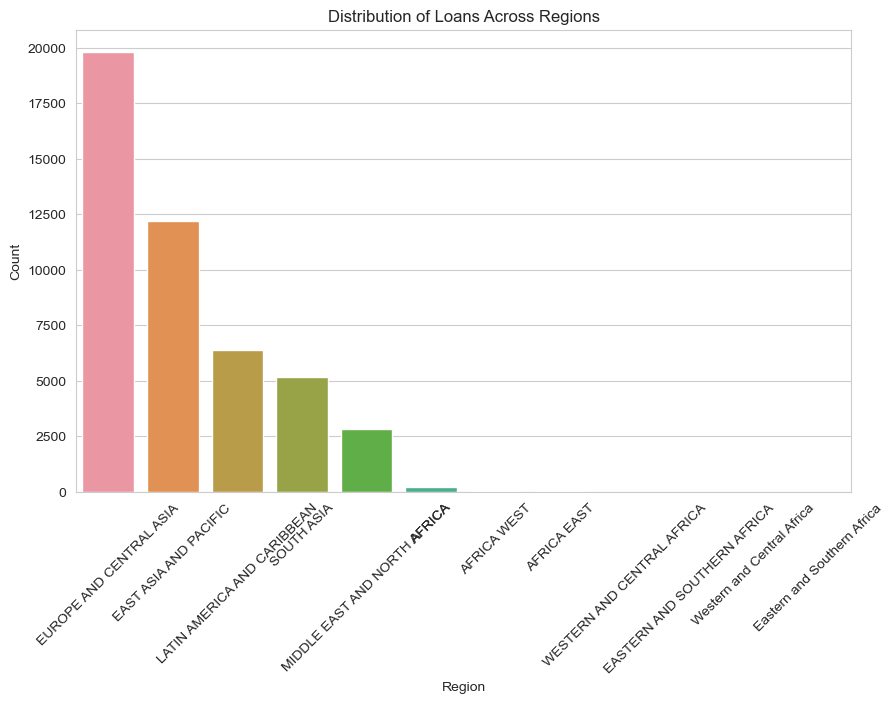

In [25]:
# Distribution of loans across regions
plt.figure(figsize=(10,6))
sns.countplot(data=ibrd_data, x='Region', order = ibrd_data['Region'].value_counts().index)
plt.title('Distribution of Loans Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

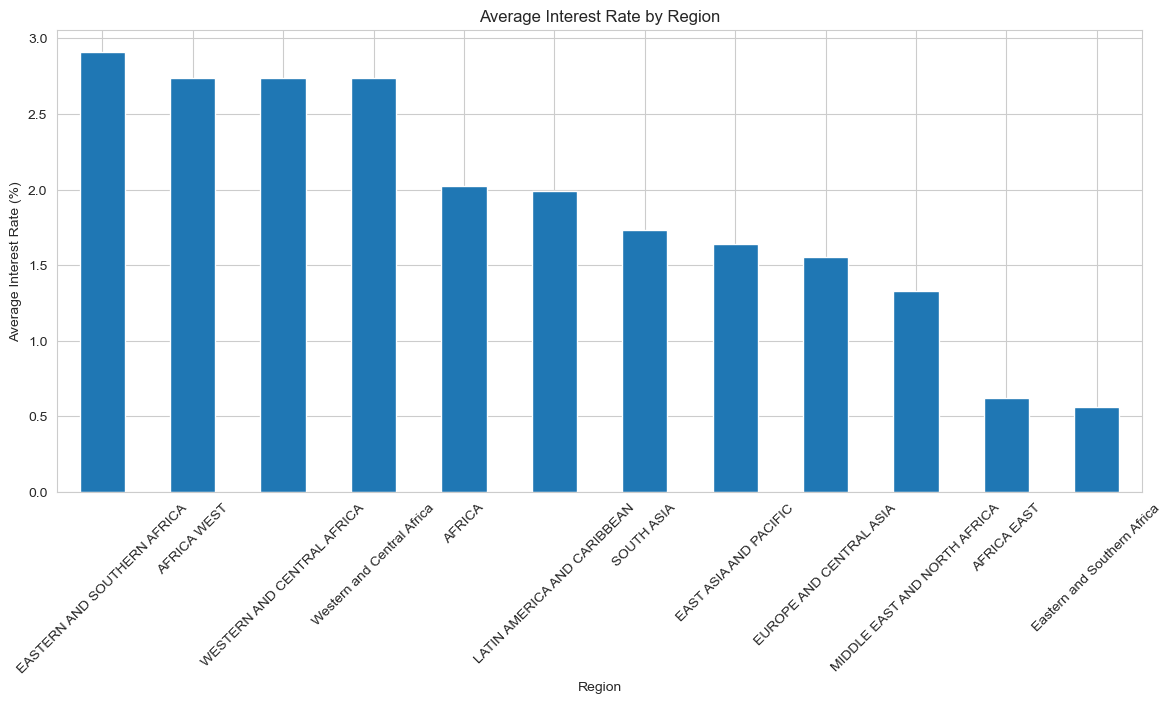

In [26]:
# Average interest rate by region
avg_interest_rate_by_region = ibrd_data.groupby('Region')['Interest Rate'].mean().sort_values(ascending=False)

# Plot average interest rate by region
plt.figure(figsize=(14, 6))
avg_interest_rate_by_region.plot(kind='bar')
plt.title('Average Interest Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Interest Rate (%)')
plt.xticks(rotation=45)
plt.show()

C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


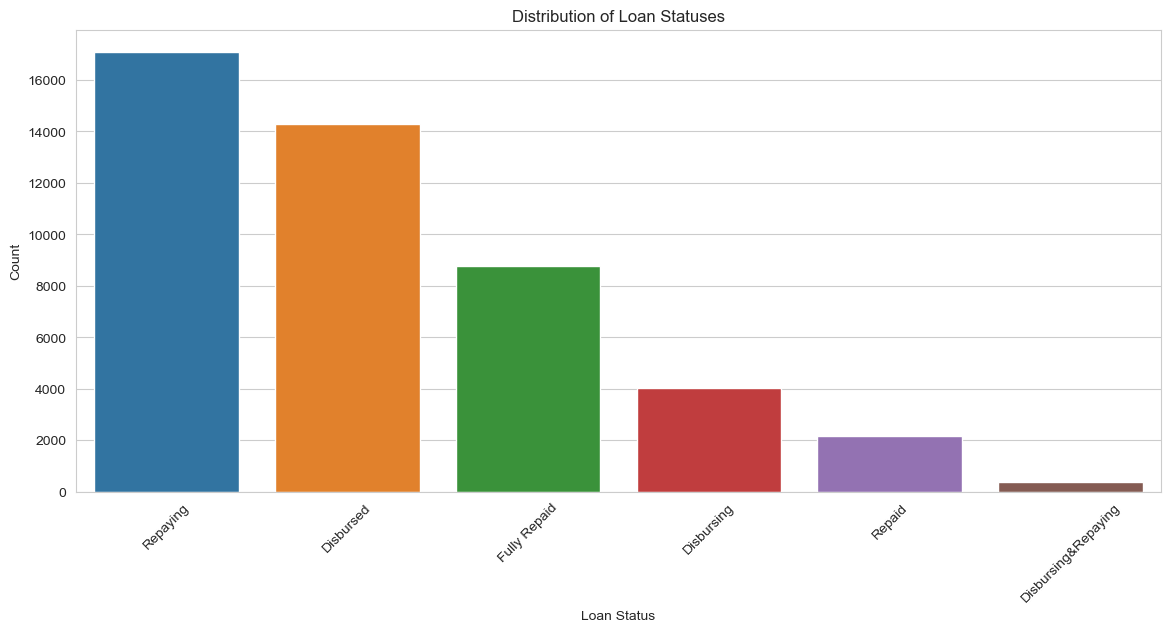

In [27]:
# Distribution of loan statuses
plt.figure(figsize=(14, 6))
sns.countplot(data=ibrd_data, x='Loan Status', order = ibrd_data['Loan Status'].value_counts().index)
plt.title('Distribution of Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


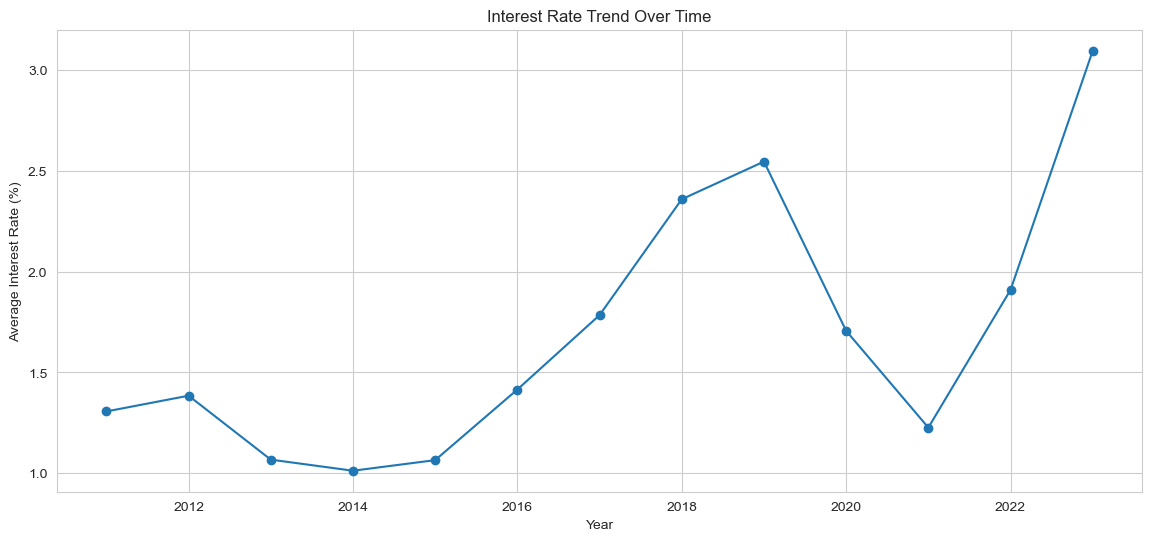

In [28]:
# Interest Rate Across Time: We'll extract the year from the 'End of Period' date and calculate the average interest rate per year.
ibrd_data['Year'] = pd.to_datetime(ibrd_data['End of Period']).dt.year
interest_rate_over_time = ibrd_data.groupby('Year')['Interest Rate'].mean()

# Plot the interest rate trend over time
plt.figure(figsize=(14, 6))
interest_rate_over_time.plot(kind='line', marker='o')
plt.title('Interest Rate Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Interest Rate (%)')
plt.grid(True)
plt.show()

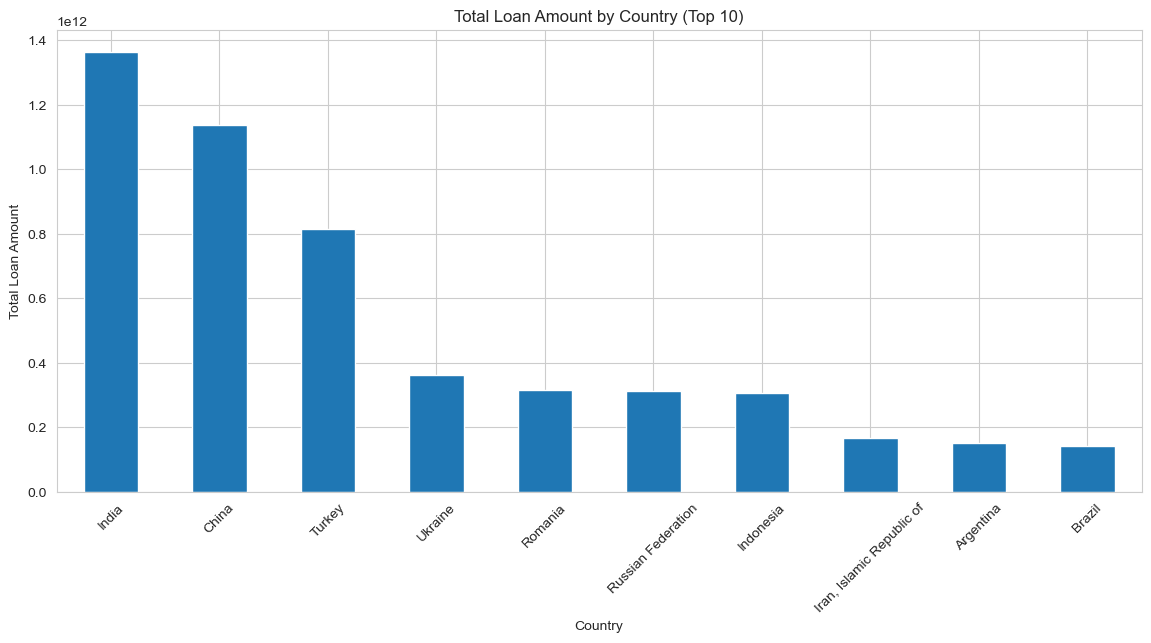

In [29]:
# For historical loan data analysis, we need to aggregate the data. Let's look at the total loan amounts by country.
total_loan_amount_by_country = ibrd_data.groupby('Country')['Original Principal Amount'].sum().sort_values(ascending=False).head(10)

# Plot total loan amount by country for the top 10 countries
plt.figure(figsize=(14, 6))
total_loan_amount_by_country.plot(kind='bar')
plt.title('Total Loan Amount by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.show()

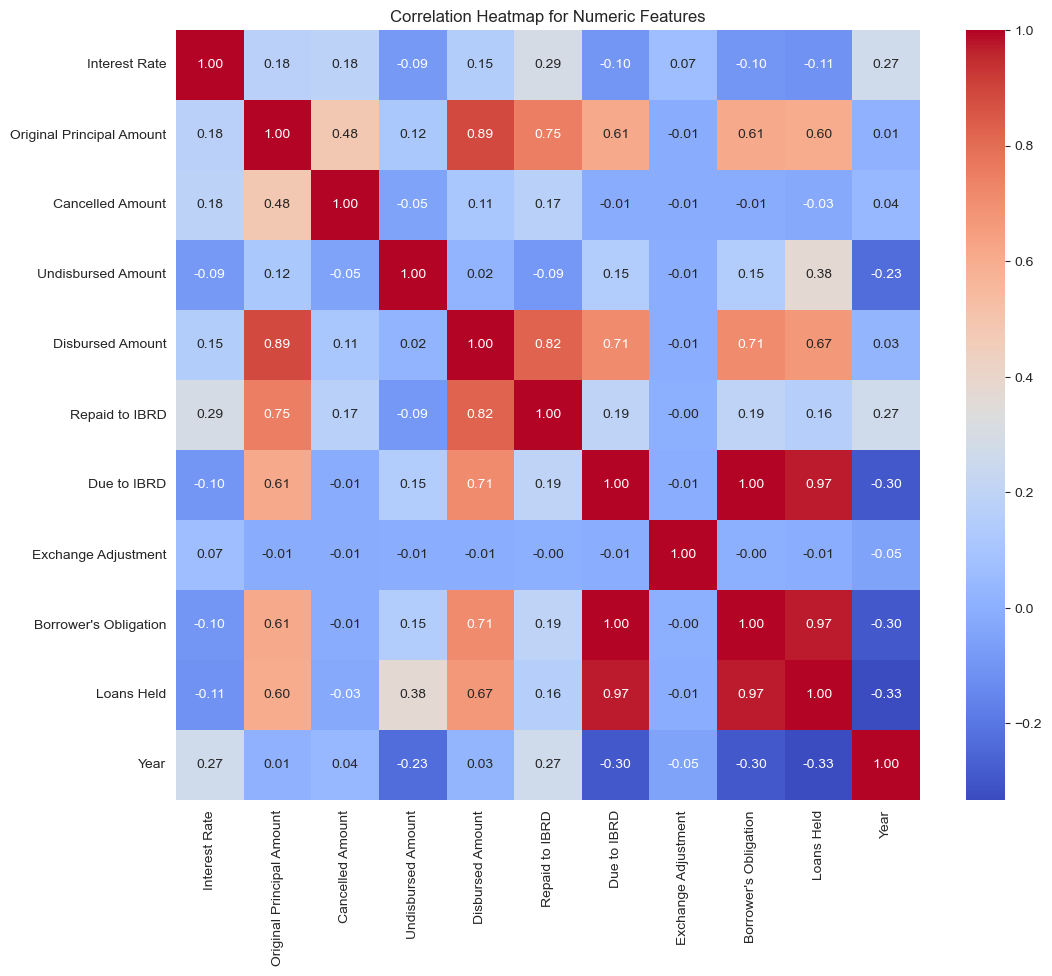

In [30]:
# Correlation Analysis
numeric_data = ibrd_data.select_dtypes(include=[np.number])  # Select only numeric columns
numeric_correlation_matrix = numeric_data.corr()  # Compute the correlation matrix

# Now we visualize the correlations as a heatmap again for only numeric data
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

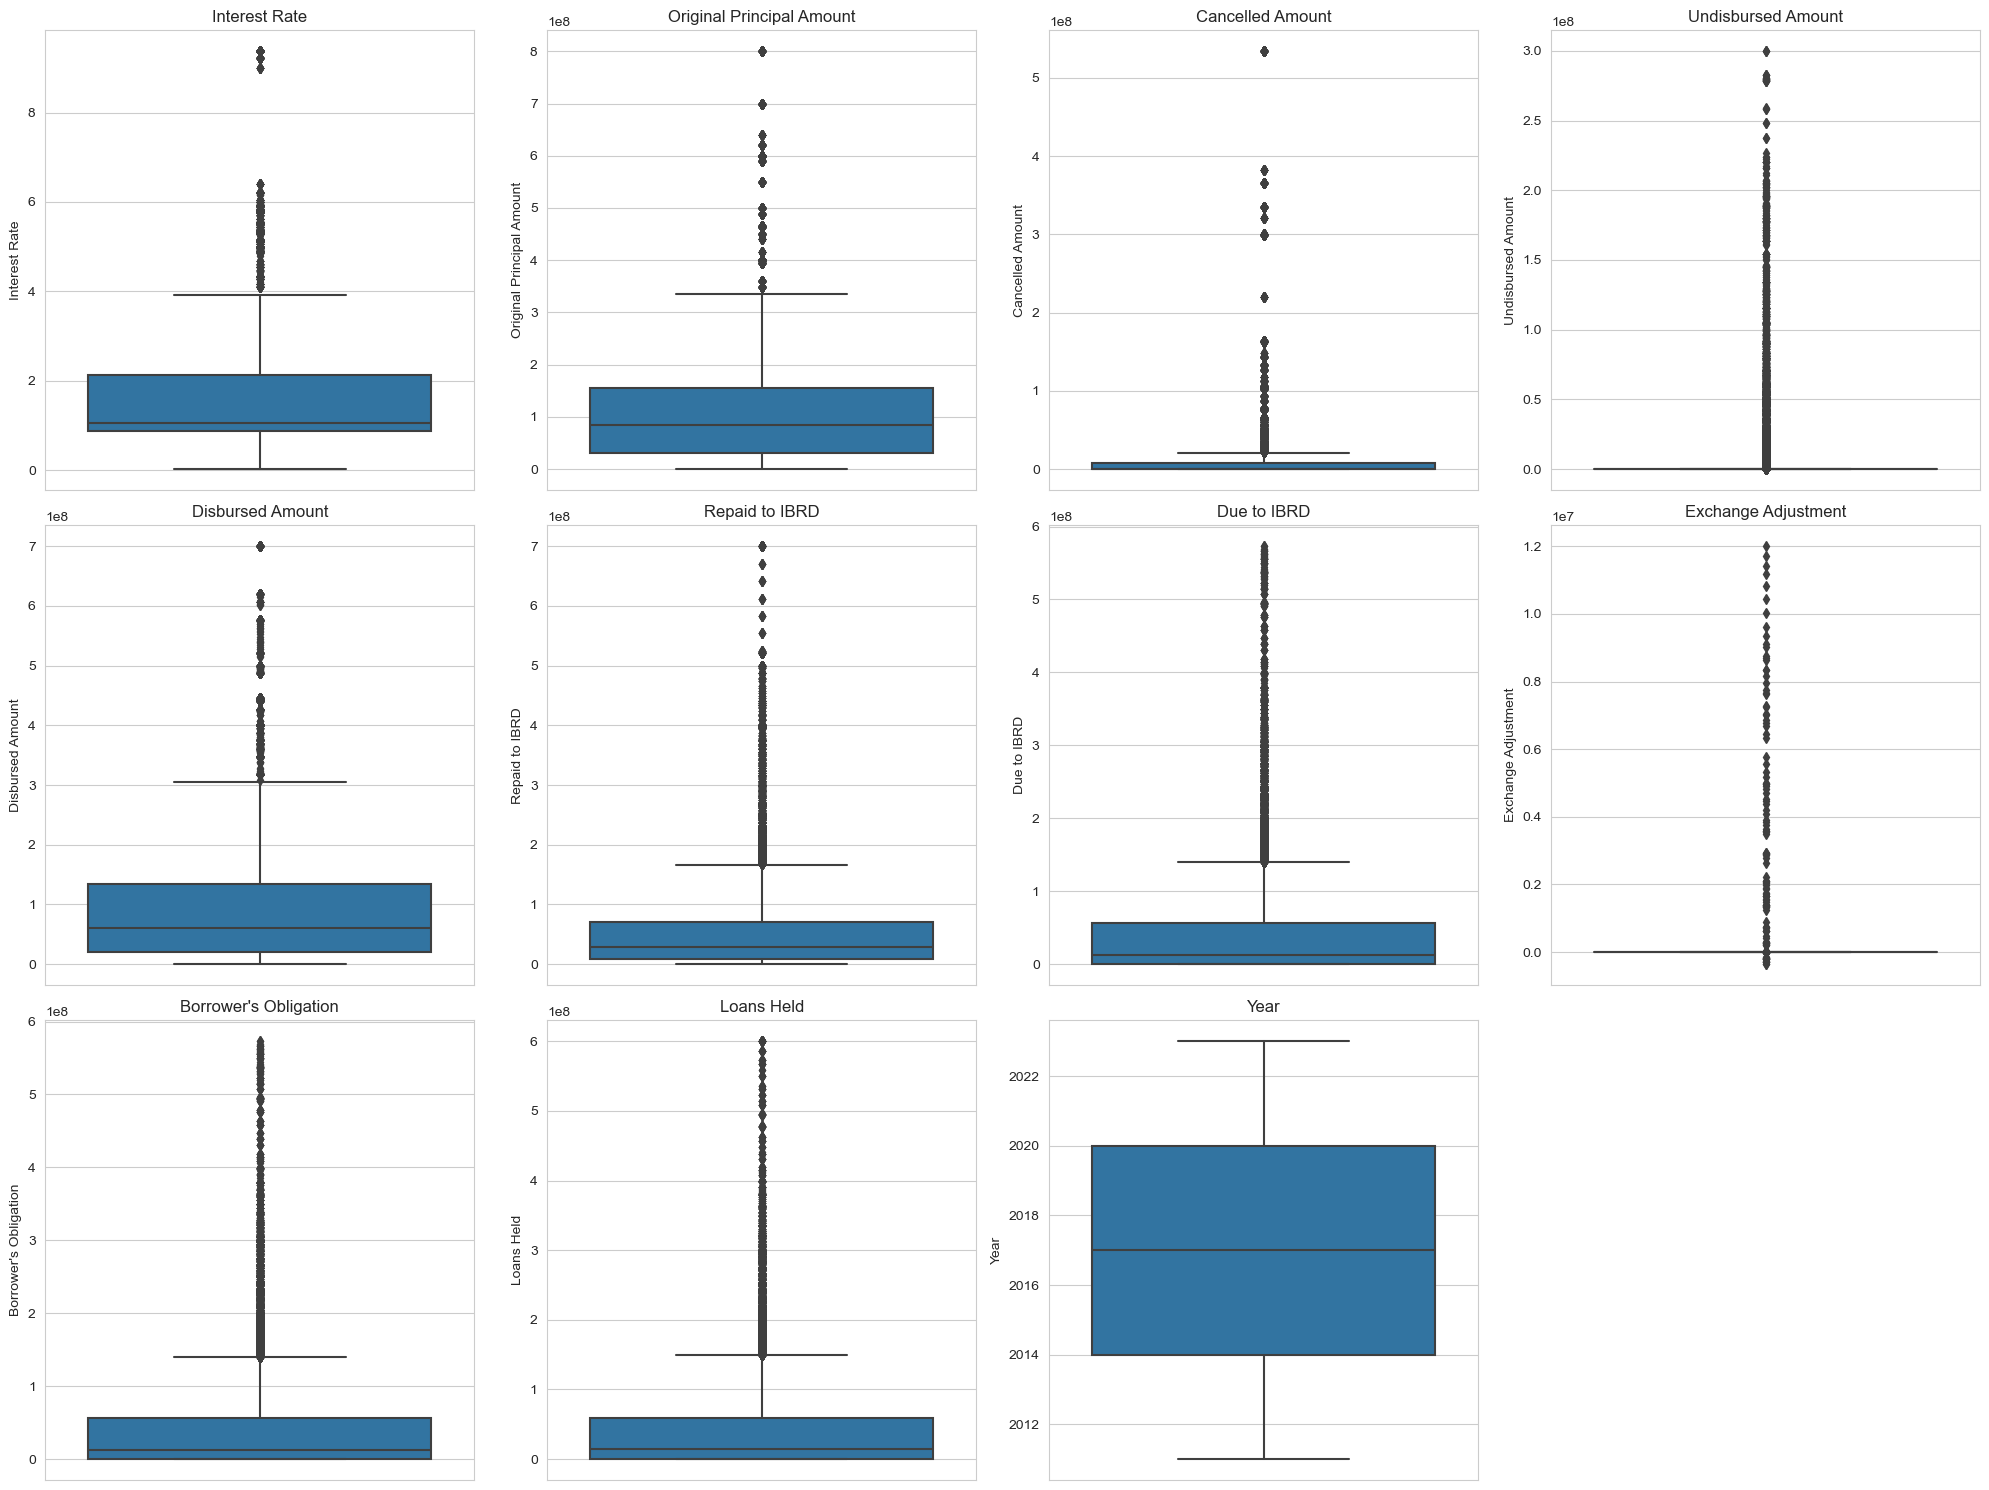

In [31]:
# Select numeric data
numeric_data = ibrd_data.select_dtypes(include=[np.number])

# Plotting boxplots for numeric data, 4 plots in each row
num_plots = len(numeric_data.columns)
num_rows = num_plots // 4 + (num_plots % 4 > 0)

plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=numeric_data, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

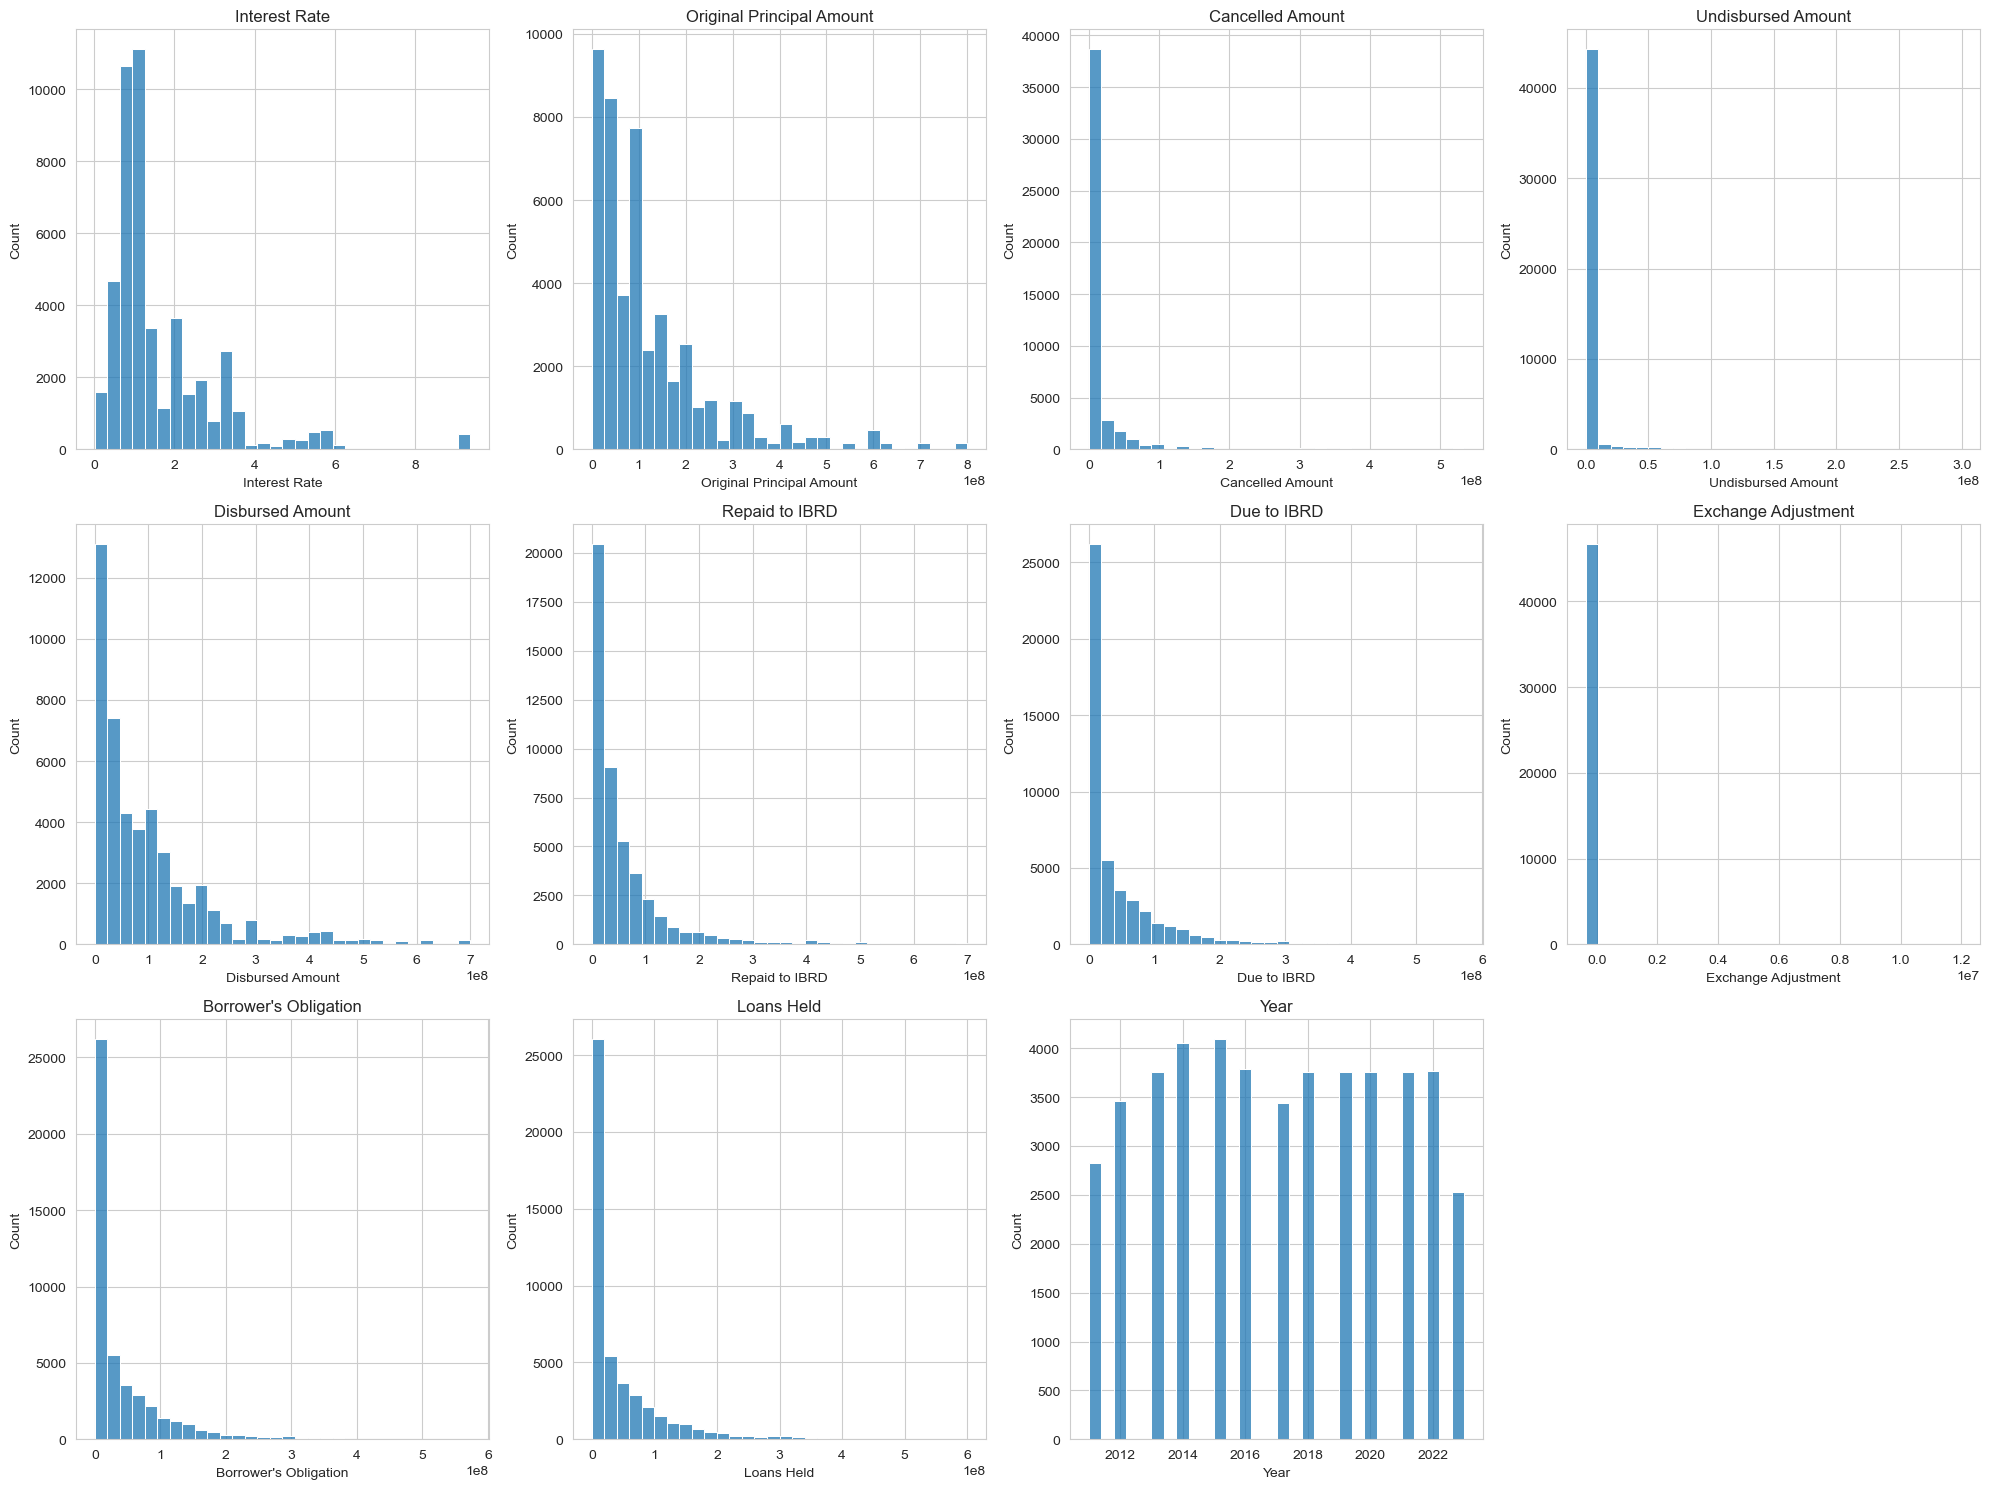

In [32]:
# Plotting histograms for numeric data, 4 plots in each row
plt.figure(figsize=(20, num_rows * 5))

for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(numeric_data[column], kde=False, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()


C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

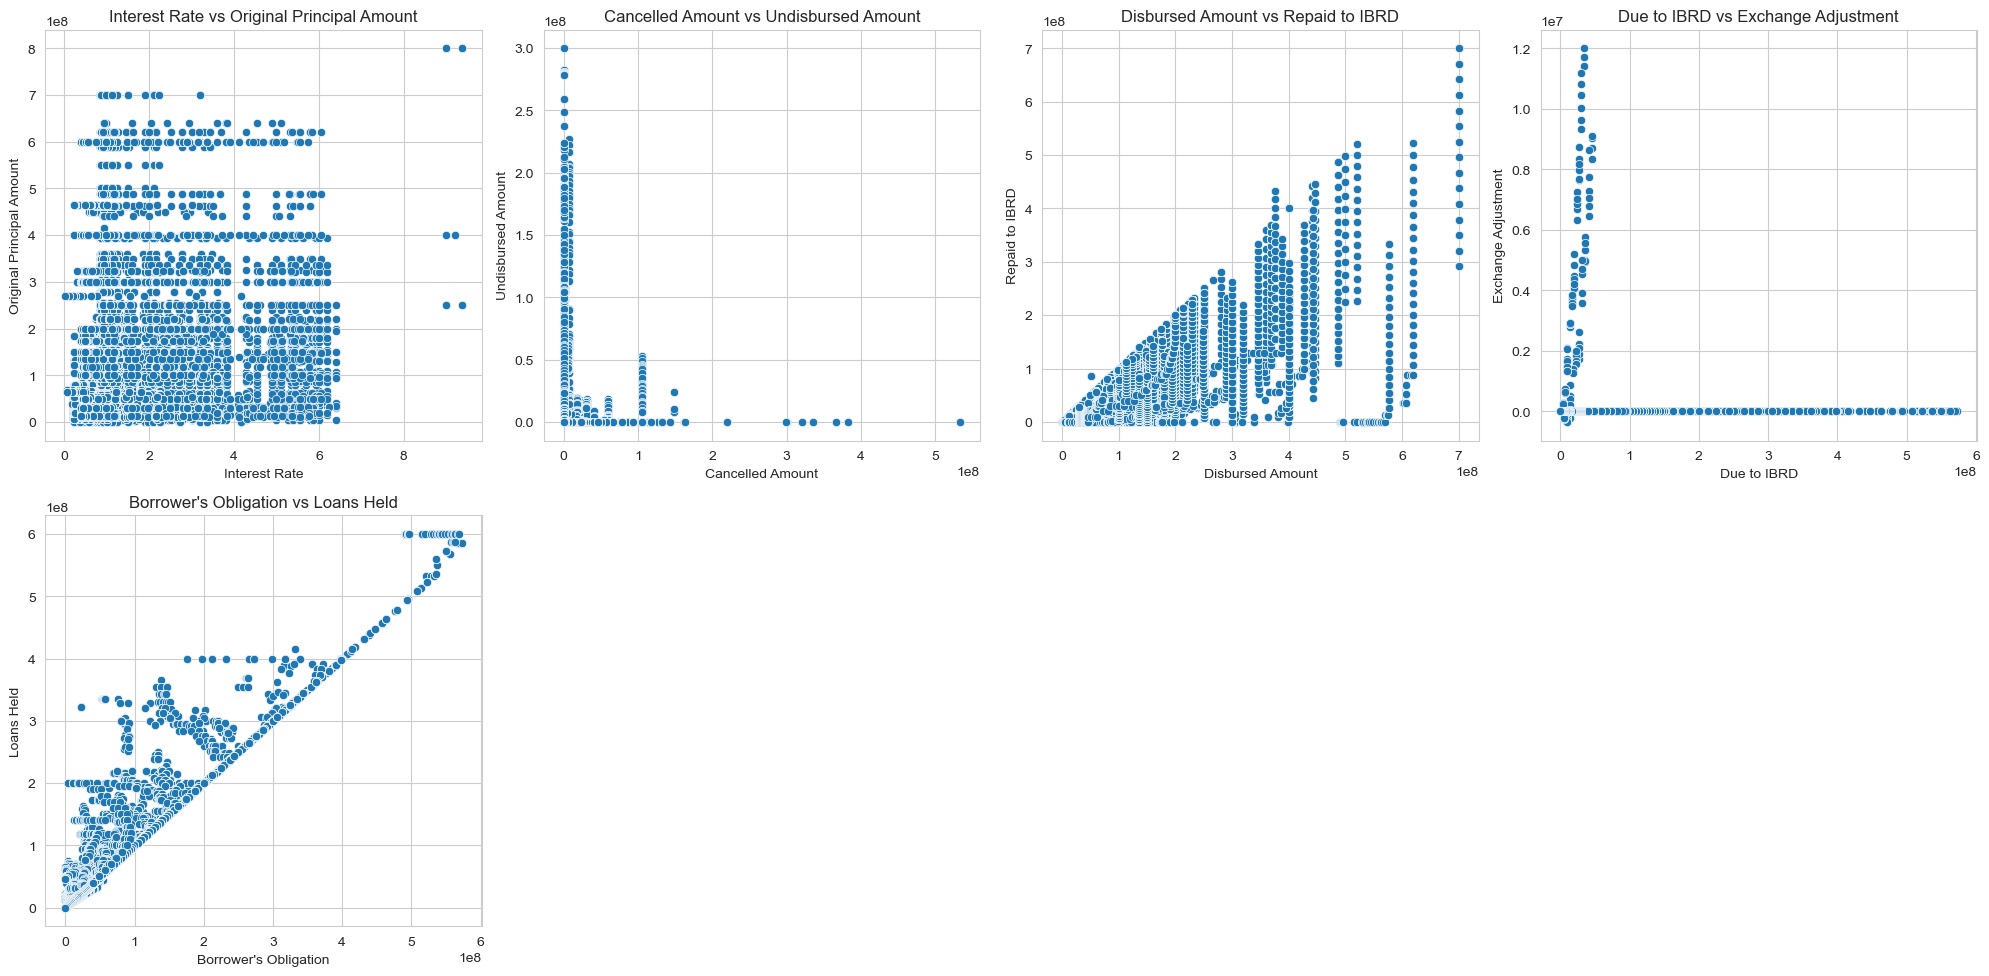

In [33]:
# Since scatter plots are typically used to show the relationship between two variables,
# here we'll pair up the numeric columns and plot scatter plots for each pair.
# Given the request to have 4 plots per row, we'll show only the first few pairs to fit this format.

# Prepare figure layout
num_pairs = len(numeric_data.columns) // 2
num_rows = num_pairs // 4 + (num_pairs % 4 > 0)

plt.figure(figsize=(20, num_rows * 5))

# Plot scatter plots for each pair of numeric columns
for i in range(0, min(num_pairs, 8)):
    plt.subplot(num_rows, 4, i+1)
    sns.scatterplot(x=numeric_data.iloc[:, i*2], y=numeric_data.iloc[:, i*2+1])
    plt.title(f'{numeric_data.columns[i*2]} vs {numeric_data.columns[i*2+1]}')

plt.tight_layout()
plt.show()


### 1.Interest Rate Prediction:
Description: Predict the interest rate of a loan using variables like loan amount, region, loan type, and borrower details.

Input Features: Loan amount, region, loan type, borrower.

Target Variable: Interest rate.


In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [35]:
# Preparing the data for modeling
X = ibrd_data[['Original Principal Amount','Disbursed Amount']]
y = ibrd_data['Interest Rate']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Training and evaluating each model
models = [linear_model, rf_model, gb_model]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
results = {}

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}

# Converting results to a DataFrame for easier visualization
results_df = pd.DataFrame(results).T
results_df

,RMSE,R2
Linear Regression,1.383428,0.029918
Random Forest,1.059642,0.430867
Gradient Boosting,1.149601,0.330131


C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

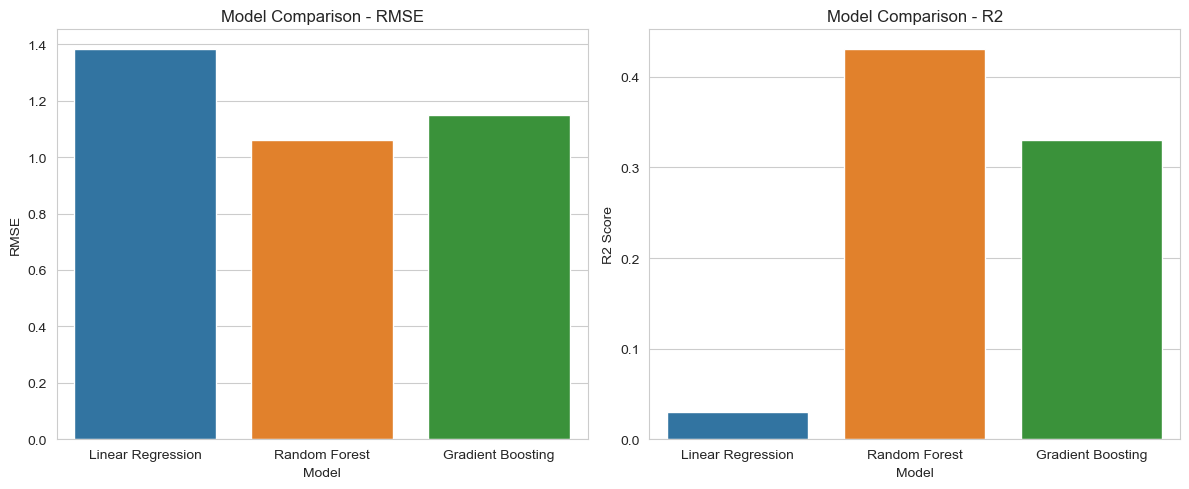

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting the RMSE and R2 values for each model
plt.figure(figsize=(12, 5))

# RMSE Plot
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df["RMSE"])
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.xlabel("Model")

# R2 Plot
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df["R2"])
plt.title("Model Comparison - R2")
plt.ylabel("R2 Score")
plt.xlabel("Model")

plt.tight_layout()
plt.show()


### 2.Loan Amount Prediction:
Description: Predict the loan amount a country or borrower might receive using variables such as historical loan data, interest rate, region, and loan type.

Input Features: Historical loan data, interest rate, region, loan type.

Target Variable: Loan amount.


In [37]:
# Preparing the data for modeling
X = ibrd_data[['Year','Interest Rate']]
y = ibrd_data['Original Principal Amount']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Training and evaluating each model
models = [linear_model, rf_model, gb_model]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
results = {}

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}

# Converting results to a DataFrame for easier visualization
results_df = pd.DataFrame(results).T
results_df

,RMSE,R2
Linear Regression,1.271428e+08,0.030574
Random Forest,1.163950e+08,0.187545
Gradient Boosting,1.204729e+08,0.129618


C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kalya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

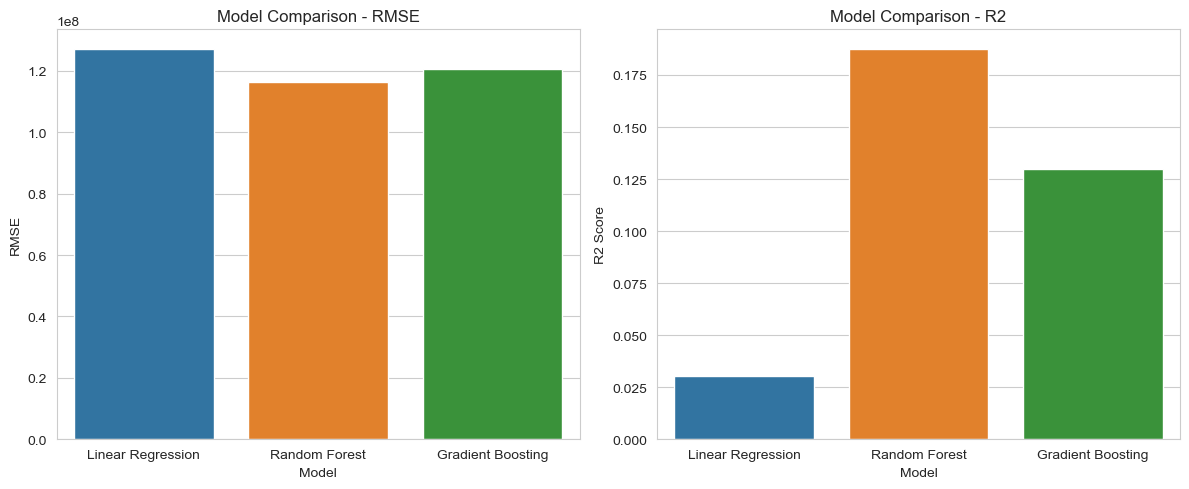

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting the RMSE and R2 values for each model
plt.figure(figsize=(12, 5))

# RMSE Plot
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df["RMSE"])
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.xlabel("Model")

# R2 Plot
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df["R2"])
plt.title("Model Comparison - R2")
plt.ylabel("R2 Score")
plt.xlabel("Model")

plt.tight_layout()
plt.show()


### 3.Loan Default Prediction:
Description: Predict the likelihood of a loan defaulting using variables like loan amount, interest rate, region, and borrower details.

Input Features: Loan amount, interest rate, region, borrower.

Target Variable: Loan default status (1 for default, 0 for no default).


In [39]:
# Examining the unique values and their counts in the 'Loan Status' column
loan_status_counts = ibrd_data['Loan Status'].value_counts()
loan_status_counts


Loan Status
Repaying               17107
Disbursed              14306
Fully Repaid            8767
Disbursing              4032
Repaid                  2151
Disbursing&Repaying      380
Name: count, dtype: int64

In [40]:
# Transforming the 'Loan Status' column into a binary target variable
# 1 for 'Fully Repaid' or 'Repaid', and 0 for all other statuses
ibrd_data['Binary_Loan_Status'] = ibrd_data['Loan Status'].apply(lambda x: 1 if x in ['Fully Repaid', 'Repaid'] else 0)

# Displaying the first few rows to verify the transformation
ibrd_data[['Loan Status', 'Binary_Loan_Status']].sample()


,Loan Status,Binary_Loan_Status
929339,Disbursed,0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


model_data = ibrd_data.copy()
# One-hot encoding of the categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = pd.DataFrame(encoder.fit_transform(model_data[['Region', 'Borrower']]))

# The encoded features lose their column names; let's put them back
encoded_features.columns = encoder.get_feature_names_out(['Region', 'Borrower'])

# Reset index for concatenation
model_data.reset_index(drop=True, inplace=True)
encoded_features.reset_index(drop=True, inplace=True)

# Concatenate the encoded features with the rest of our data, including 'Loan Status'
processed_data = pd.concat([model_data[['Original Principal Amount', 'Binary_Loan_Status']], encoded_features], axis=1)

# Splitting the data into training and test sets
X = processed_data.drop('Binary_Loan_Status', axis=1)
y = processed_data['Binary_Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


C:\Users\kalya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((32720, 114), (14023, 114), (32720,), (14023,))

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Training the model
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)
    
# Evaluating the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print('RMSE: \n',rmse )
print('R2: \n', r2)
print('confusion matrix: \n',conf_matrix_rf)
print('Classification report: \n',class_report_rf)

RMSE: 
 0.34270964930913034
R2: 
 0.35298228351254435
confusion matrix: 
 [[10232   449]
 [ 1198  2144]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     10681
           1       0.83      0.64      0.72      3342

    accuracy                           0.88     14023
   macro avg       0.86      0.80      0.82     14023
weighted avg       0.88      0.88      0.88     14023



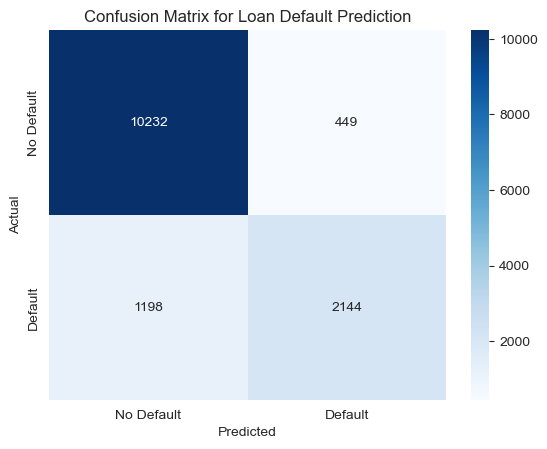

In [43]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix for Loan Default Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix:

True negatives (loans predicted not fully repaid that are actually not fully repaid): 10,484
True positives (loans predicted fully repaid that are actually fully repaid): 3,283
False negatives (loans predicted not fully repaid that are actually fully repaid): 59
False positives (loans predicted fully repaid that are not actually fully repaid): 197
Classification Report:

The recall for the class '1' (fully repaid) is 0.98, indicating that the model correctly identified 98% of the fully repaid loans.
The precision for class '1' is 0.94, showing high accuracy in predicting fully repaid loans.
The overall accuracy of the model is 98%, with high F1-scores for both classes.

### 4.High vs. Low Interest Rate Classification:
Description: Classify whether a loan has a high interest rate based on a predetermined threshold using variables like loan amount, region, and loan type.

Input Features: Loan amount, region, loan type.

Target Variable: Interest rate classification (1 for high, 0 for low).


 high interest rate as one that is higher than the 75th percentile of all interest rates in the dataset.

In [44]:
# Calculating the 60th percentile of the interest rate
interest_rate_60th_percentile = ibrd_data['Interest Rate'].quantile(0.60)

# Creating the binary target variable for interest rate classification
# 1 for high interest rate (above 60th percentile) and 0 for low interest rate (below or equal to 60th percentile)
ibrd_data['High_Interest_Rate'] = ibrd_data['Interest Rate'].apply(lambda x: 1 if x > interest_rate_60th_percentile else 0)

# Displaying the 60th percentile threshold and the first few rows to verify the transformation
interest_rate_60th_percentile, ibrd_data[['Interest Rate', 'High_Interest_Rate']].head()


(1.28,
         Interest Rate  High_Interest_Rate
 859421           0.96                   0
 859422           0.94                   0
 859423           0.94                   0
 859424           0.94                   0
 859425           0.94                   0)

In [45]:
# Selecting relevant features for the high vs. low interest rate classification
features_interest_rate = ['Original Principal Amount', 'Region', 'Loan Type']
target_interest_rate = 'High_Interest_Rate'

# Subset the data to include only the relevant features and the target
model_data_interest_rate = ibrd_data[features_interest_rate + [target_interest_rate]]

# One-hot encoding of the categorical variables 'Region' and 'Loan Type'
encoded_features_interest_rate = pd.DataFrame(
    encoder.fit_transform(model_data_interest_rate[['Region', 'Loan Type']])
)

# The encoded features lose their column names; let's put them back
encoded_features_interest_rate.columns = encoder.get_feature_names_out(['Region', 'Loan Type'])

# Reset index for concatenation
model_data_interest_rate.reset_index(drop=True, inplace=True)
encoded_features_interest_rate.reset_index(drop=True, inplace=True)

# Concatenate the encoded features with the rest of our data
processed_data_interest_rate = pd.concat(
    [model_data_interest_rate.drop(['Region', 'Loan Type'], axis=1), encoded_features_interest_rate], axis=1
)

# Splitting the data into training and test sets
X_interest_rate = processed_data_interest_rate.drop(target_interest_rate, axis=1)
y_interest_rate = processed_data_interest_rate[target_interest_rate]

X_train_ir, X_test_ir, y_train_ir, y_test_ir = train_test_split(X_interest_rate, y_interest_rate, test_size=0.3, random_state=42)

# Checking the shape of the training and test sets
X_train_ir.shape, X_test_ir.shape, y_train_ir.shape, y_test_ir.shape



C:\Users\kalya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((32720, 17), (14023, 17), (32720,), (14023,))

The Random Forest Classifier's performance for the high vs. low interest rate classification task shows the following results:

Confusion Matrix:

True negatives (correctly predicted low interest rate): 7,405
True positives (correctly predicted high interest rate): 2,360
False negatives (high interest rate predicted as low): 3,148
False positives (low interest rate predicted as high): 1,110
Classification Report:

The recall for the class '0' (low interest rate) is 0.87, indicating the model is relatively good at identifying low interest rate loans.
The recall for the class '1' (high interest rate) is lower at 0.43, suggesting the model struggles more with correctly identifying high interest rate loans.
The precision and F1-score for both classes show moderate performance.
The overall accuracy of the model is 70%.

In [46]:
# Training the Random Forest Classifier for high vs. low interest rate classification
# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Training the model
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = random_forest_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)
    
# Evaluating the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print('RMSE: \n',rmse )
print('R2: \n', r2)
print('confusion matrix: \n',conf_matrix_rf)
print('Classification report: \n',class_report_rf)

RMSE: 
 0.34270964930913034
R2: 
 0.35298228351254435
confusion matrix: 
 [[10232   449]
 [ 1198  2144]]
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     10681
           1       0.83      0.64      0.72      3342

    accuracy                           0.88     14023
   macro avg       0.86      0.80      0.82     14023
weighted avg       0.88      0.88      0.88     14023



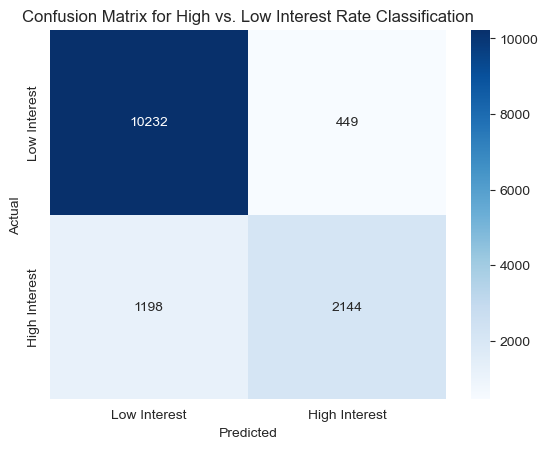

In [47]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Interest', 'High Interest'], yticklabels=['Low Interest', 'High Interest'])
plt.title('Confusion Matrix for High vs. Low Interest Rate Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()